In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [194]:
import pandas as pd

#Load the dataset
bank_data = pd.read_csv("bank.csv",sep=';', quotechar='"')

In [195]:
print(bank_data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [200]:
# Display basic information about the dataset
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB
None


In [201]:
# Display summary statistics of numerical columns
print(bank_data.describe())

               age          job      marital    education      default  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095     4.411192     1.147755     1.231365     0.016810   
std      10.576211     3.255716     0.599650     0.748744     0.128575   
min      19.000000     0.000000     0.000000     0.000000     0.000000   
25%      33.000000     1.000000     1.000000     1.000000     0.000000   
50%      39.000000     4.000000     1.000000     1.000000     0.000000   
75%      49.000000     7.000000     2.000000     2.000000     0.000000   
max      87.000000    11.000000     2.000000     3.000000     1.000000   

            balance      housing         loan      contact          day  \
count   4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean    1422.657819     0.566025     0.152842     0.652289    15.915284   
std     3009.638142     0.495676     0.359875     0.901498     8.247667   
min    -3313.000000     0.000000 

In [202]:
# Check for missing values
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [204]:
# Display unique values of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    print(col, bank_data[col].unique())

job [10  7  4  1  6  9  2  0  8  3  5 11]
marital [1 2 0]
education [0 1 2 3]
default [0 1]
housing [0 1]
loan [0 1]
contact [0 2 1]
month [10  8  0  6  3  1  4  5  9 11  7  2]
poutcome [3 0 1 2]
y [0 1]


In [205]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])

In [206]:
print(bank_data[col] )

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64


In [207]:
from sklearn.model_selection import train_test_split

# Split data into features and target variable
X = bank_data.drop('y', axis=1)  # Features
y = bank_data['y']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)

Train set - Features: (3616, 16) Target: (3616,)
Test set - Features: (905, 16) Target: (905,)


In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [211]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [212]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [217]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8718232044198895


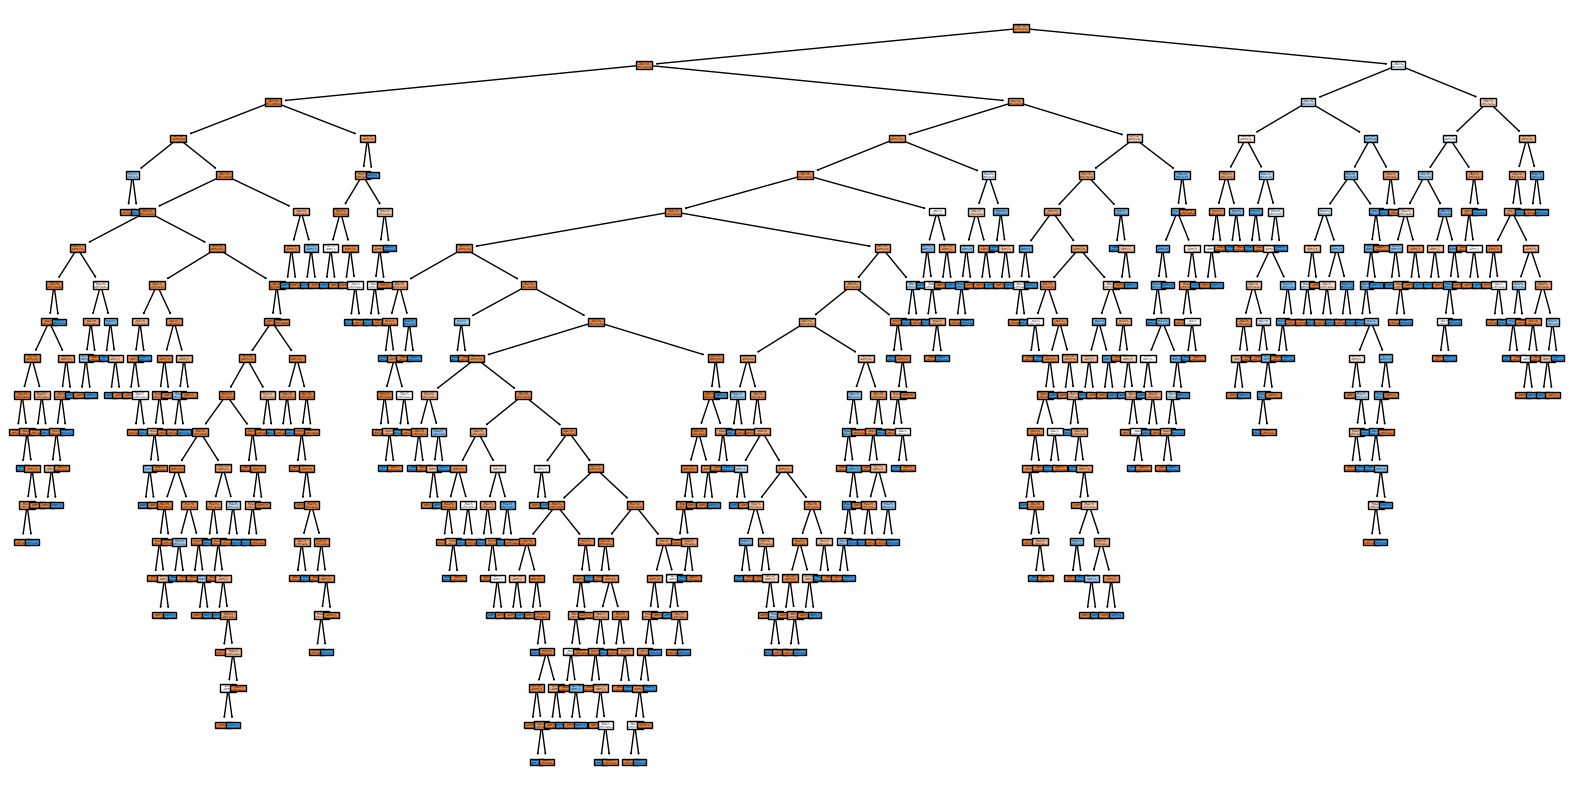

In [221]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()

In [222]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[743  64]
 [ 52  46]]


In [223]:
from sklearn.metrics import classification_report

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



In [226]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier with pruning parameters
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

In [227]:
from sklearn.tree import DecisionTreeClassifier
# Train the pruned classifier on the training data
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [228]:
# Predict on the test set
y_pred_pruned = clf_pruned.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy (Pruned Model):", accuracy_pruned)

Accuracy (Pruned Model): 0.8961325966850828


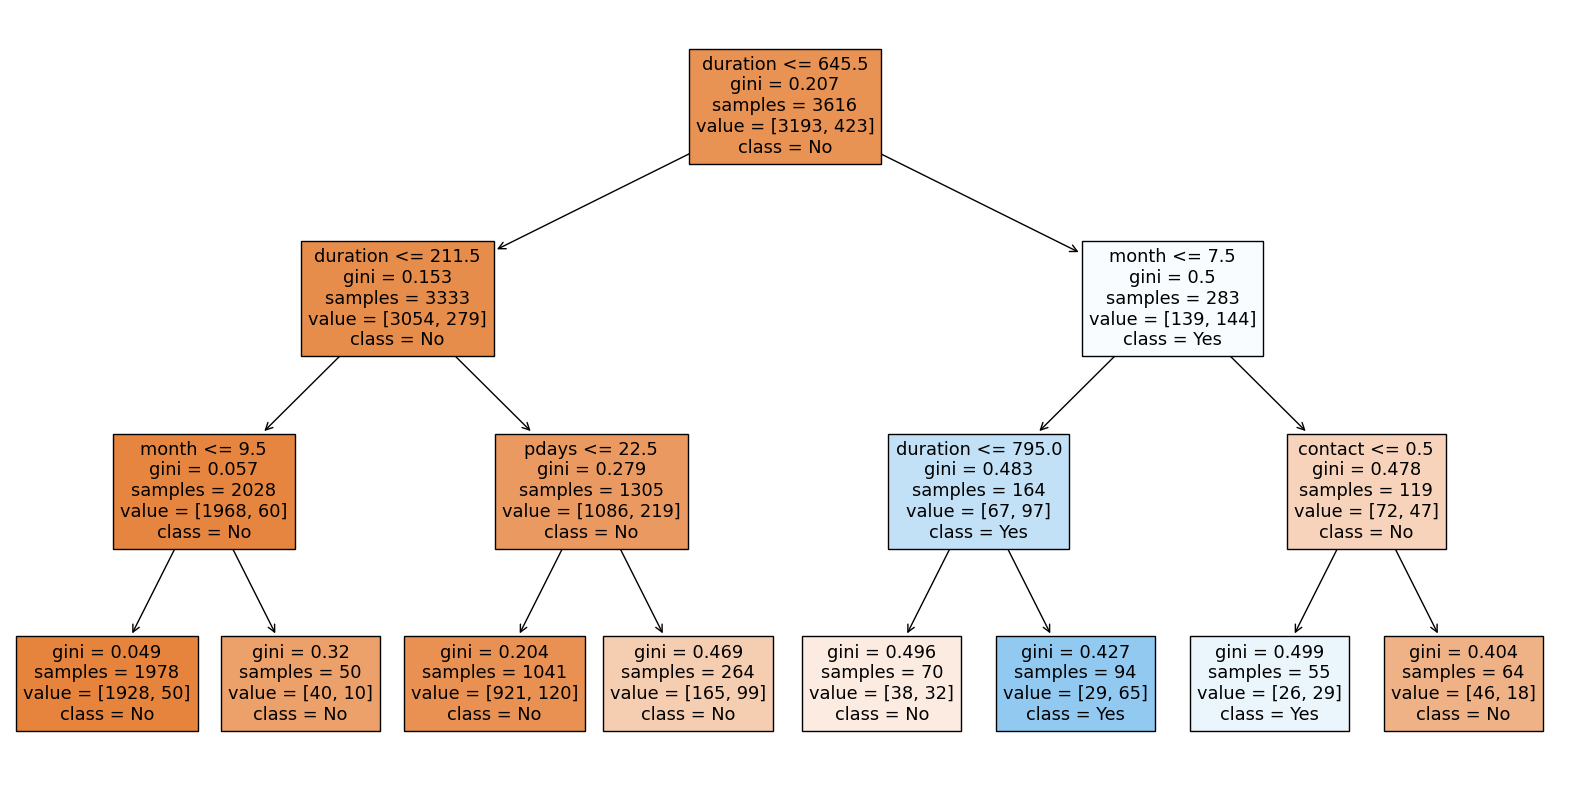

In [230]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the pruned decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [231]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the pruned model
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
print("Confusion Matrix (Pruned Model):")
print(conf_matrix_pruned)

Confusion Matrix (Pruned Model):
[[787  20]
 [ 74  24]]


In [233]:
from sklearn.metrics import classification_report

# Print classification report for the pruned model
class_report_pruned = classification_report(y_test, y_pred_pruned)
print("Classification Report (Pruned Model):")
print(class_report_pruned)

Classification Report (Pruned Model):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.55      0.24      0.34        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905

